# Módulos

In [1]:
import os # Sistema (arquivos)
import numpy as np # Matrizes
import pandas as pd # Tabelas

import matplotlib.pyplot as plt # Gráficos

# Formatação de gráficos
from matplotlib import cm 
from matplotlib.colors import Normalize

cores = {
    
    'valor': (0/255, 98/255, 105/255),
    'valorinveste': (71/255, 47/255, 146/255),
    'pipelinevalor': (158/255, 0/255, 93/255),
    'globorural': (52/255, 131/255, 68/255),
    'epocanegocios': (0/255, 0/255, 0/255),
    'revistapegn': (246/255, 84/255, 17/255),
    'umsoplaneta': (97/255, 155/255, 19/255),
    
}

nomes = {
    
    'valor': 'Valor Econômico',
    'valorinveste': 'Valor Investe',
    'pipelinevalor': 'Pipeline (Valor)',
    'globorural': 'Globo Rural',
    'epocanegocios': 'Época Negócios',
    'revistapegn': 'Revista PEGN',
    'umsoplaneta': 'Um Só Planeta'

}

# Funções

In [2]:
def visualizar_parametragem(dataframe, seleção = 'valor'):

    # Tratamento dos dados
    df = dataframe.copy()
    df = df[df.selection == seleção].copy()
    df.sort_values('perplexity', inplace = True)
    mínimos = (df[['simulation', 'n_components', 'perplexity']] 
               .groupby(['simulation', 'n_components']).mean() # Média dos KFolds por simulação
               .groupby('n_components').min() # Mínima perplexidade simulada por nº de tópico
               .reset_index())    
    
    # Variáveis contra a perplexidade (2D)
    fig = plt.figure(figsize=(15, 5), dpi = 300)
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], hspace=0.3, wspace=0.2)
    
    fontsize = 13
    
        # Perplexidade por nº de tópicos
    ax1 = fig.add_subplot(gs[0, :])
    ax1.set_title(f'Perplexidade por nº de tópicos em {nomes[seleção]}', pad=10, fontsize=fontsize)
    ax1.scatter(df.n_components, df.perplexity, s=10, color = cores[seleção])
    ax1.plot(mínimos.n_components, mínimos.perplexity, color = cores[seleção], linewidth=2, label = 'Mínima perplexidade por nº de tópicos')
    ax1.grid(linestyle=':', color='black', alpha=0.3)
    ax1.set_xlabel('Nº de tópicos', fontsize=fontsize-2)
    ax1.set_ylabel('Perplexidade', fontsize=fontsize-2)
    ax1.legend()
    
    perplexidades = (df.perplexity/1000).round(1)
    mín, máx = perplexidades.min(), perplexidades.max()
    
    yticks = np.linspace(mín, máx, 7)*1000
    ytickslabels = list(map(lambda x: f"{x:,.0f}".replace(",", "."), yticks))
    ax1.set_yticks(yticks)
    ax1.set_yticklabels(ytickslabels)
    
    window = 15 # Janela comum da média móvel.
    
        # Learnings decay ordenado por perplexidade
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.set_title('Learning decay ordenado por perplexidade', pad=10, fontsize=fontsize)
    ax2.scatter(df.perplexity, df.learning_decay, marker='o', s=10, color = cores[seleção])
    #ax2.plot(df.perplexity, df.learning_decay.rolling(window, window).mean(), color = cores[seleção], linewidth=2, alpha=0.7)
    ax2.grid(linestyle=':', color='black', alpha=0.3)
    ax2.set_xlabel('Perplexidade', fontsize=fontsize-2, labelpad=10)
    ax2.set_ylabel('Learning decay', fontsize=fontsize-2)
    
    xticks = np.linspace(mín, máx, 7)*1000
    xticklabels = list(map(lambda x: f"{x:,.0f}".replace(",", "."), xticks))
    ax2.set_xticks(xticks)
    ax2.set_xticklabels(xticklabels)
    
        # Learning offset ordenado por perplexidade
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.set_title('Learning offset ordenado por perplexidade', pad=10, fontsize = fontsize)
    ax3.scatter(df.perplexity, df.learning_offset, marker='o', s=10, color = cores[seleção])
    #ax3.plot(df.perplexity, df.learning_offset.rolling(window, window).mean(), color = cores[seleção], linewidth=2, alpha=0.7)
    ax3.grid(linestyle=':', color='black', alpha=0.3)
    ax3.set_xlabel('Perplexidade', fontsize=fontsize-2, labelpad=10)
    ax3.set_ylabel('Learning offset', fontsize=fontsize-2)
    
    ax3.set_xticks(xticks)
    ax3.set_xticklabels(xticklabels)
    yticks = ax3.get_yticks()[1:-1]
    ytickslabels = list(map(lambda x: f"{x:,.0f}".replace(",", "."), yticks))
    ax3.set_yticks(yticks)
    ax3.set_yticklabels(ytickslabels)
    
        # Visualização, finalmente
    plt.show()
    
    # Variáveis combinadas 2 a 2 contra a perplexidade (3D)
    norm = Normalize(vmin = df.perplexity.min(), vmax = df.perplexity.max())
    colors = cm.coolwarm(norm(df.perplexity))
    
    fig, axs = plt.subplots(1, 3, figsize = (15, 4.3), dpi = 150, constrained_layout = True)
    fontsize = 15
    s = 150
    
        # Nº de tópicos pelo learning decay
    sc1 = axs[0].scatter(df.n_components, df.learning_decay, c = colors, s = s)
    axs[0].set_title('Learning decay por nº de tópicos', fontsize = fontsize, pad=10)
    axs[0].tick_params(axis = 'both', which = 'major', labelsize = fontsize-2)
    axs[0].set_xlabel('Nº de tópicos', fontsize = fontsize-2, labelpad=10)
    axs[0].set_ylabel('Learning decay', fontsize = fontsize-2)
    axs[0].grid(linestyle = ':', alpha = .3, color = 'black')
    
        # Nº de tópicos pelo learning offset
    sc2 = axs[1].scatter(df.n_components, df.learning_offset, c = colors, s = s)
    axs[1].set_title('Learning offset por nº de tópicos', fontsize = fontsize, pad=10)
    axs[1].tick_params(axis = 'both', which = 'major', labelsize = fontsize-2)
    axs[1].set_xlabel('Nº de tópicos', fontsize = fontsize-2, labelpad=10)
    axs[1].set_ylabel('Learning offset', fontsize = fontsize-2)
    axs[1].grid(linestyle = ':', alpha = .3, color = 'black')
    
    yticks = axs[1].get_yticks()[1:-1]
    ytickslabels = list(map(lambda x: f"{x:,.0f}".replace(",", "."), yticks))
    axs[1].set_yticks(yticks)
    axs[1].set_yticklabels(ytickslabels)
    
        # Learning decay por learning offset
    sc3 = axs[2].scatter(df.learning_decay, df.learning_offset, c = colors, s = s)
    axs[2].set_title('Learning offset por learning decay', fontsize = fontsize, pad=10)
    axs[2].tick_params(axis = 'both', which = 'major', labelsize = fontsize-2)
    axs[2].set_xlabel('Learning decay', fontsize = fontsize-2, labelpad=10)
    axs[2].set_ylabel('Learning offset', fontsize = fontsize-2)
    axs[2].grid(linestyle = ':', alpha = .3, color = 'black')
    
    axs[2].set_yticks(yticks)
    axs[2].set_yticklabels(ytickslabels)
    
        # Barra de cor referente à perplexidade
    colorbar = cm.ScalarMappable(norm = norm, cmap = 'coolwarm')
    cbar = fig.colorbar(colorbar, ax = axs, orientation = 'vertical', label = 'Perplexidade')
    cbar.ax.tick_params(labelsize=fontsize-2)  
    cbar.set_label('Perplexidade', fontsize=fontsize, labelpad=10)  
    
        # Visualização, finalmente
    plt.show()

# Visualização

## Otimização de parâmetros

In [3]:
# Parâmetros testados
dfs = []
for arquivo in os.listdir('parametragem'):
    df = pd.read_excel(f'parametragem/{arquivo}')
    df['selection'] = arquivo.split(' - ')[0]
    dfs.append(df)

parametragem = pd.concat(dfs, ignore_index = True)
parametragem = parametragem[parametragem.simulation > 0].copy()

# Parâmetros que minimizam a perplexidade
simulações = parametragem.groupby(['selection', 'simulation']).mean().reset_index()
parâmetros_ótimos = simulações.sort_values('perplexity').drop_duplicates(subset = 'selection')
parâmetros_ótimos['method'] = 'online' 
parâmetros_ótimos = parâmetros_ótimos[['selection', 'method', 'n_components', 'learning_decay', 'learning_offset']]
parâmetros_ótimos.to_excel('parâmetros ótimos para o método online.xlsx', index = False)

# Mínima perplexidade por nº de tópicos
sorrisos_perplexos = (parametragem[['selection', 'simulation', 'n_components', 'perplexity']] 
                      .groupby(['selection','simulation', 'n_components']).mean() # Média dos KFolds por simulação
                      .groupby(['selection', 'n_components']).min() # Mínima perplexidade simulada por nº de tópico
                      .reset_index())    
sorrisos_perplexos.columns = ['seleção', 'nº de tópicos', 'perplexidade']

In [4]:
parâmetros_ótimos

,selection,method,n_components,learning_decay,learning_offset
101,globorural,online,40.0,0.634183,159.0
332,valorinveste,online,30.0,0.606511,348.0
282,valor,online,40.0,0.620335,904.0
196,revistapegn,online,20.0,0.606511,348.0
25,epocanegocios,online,50.0,0.608372,494.0


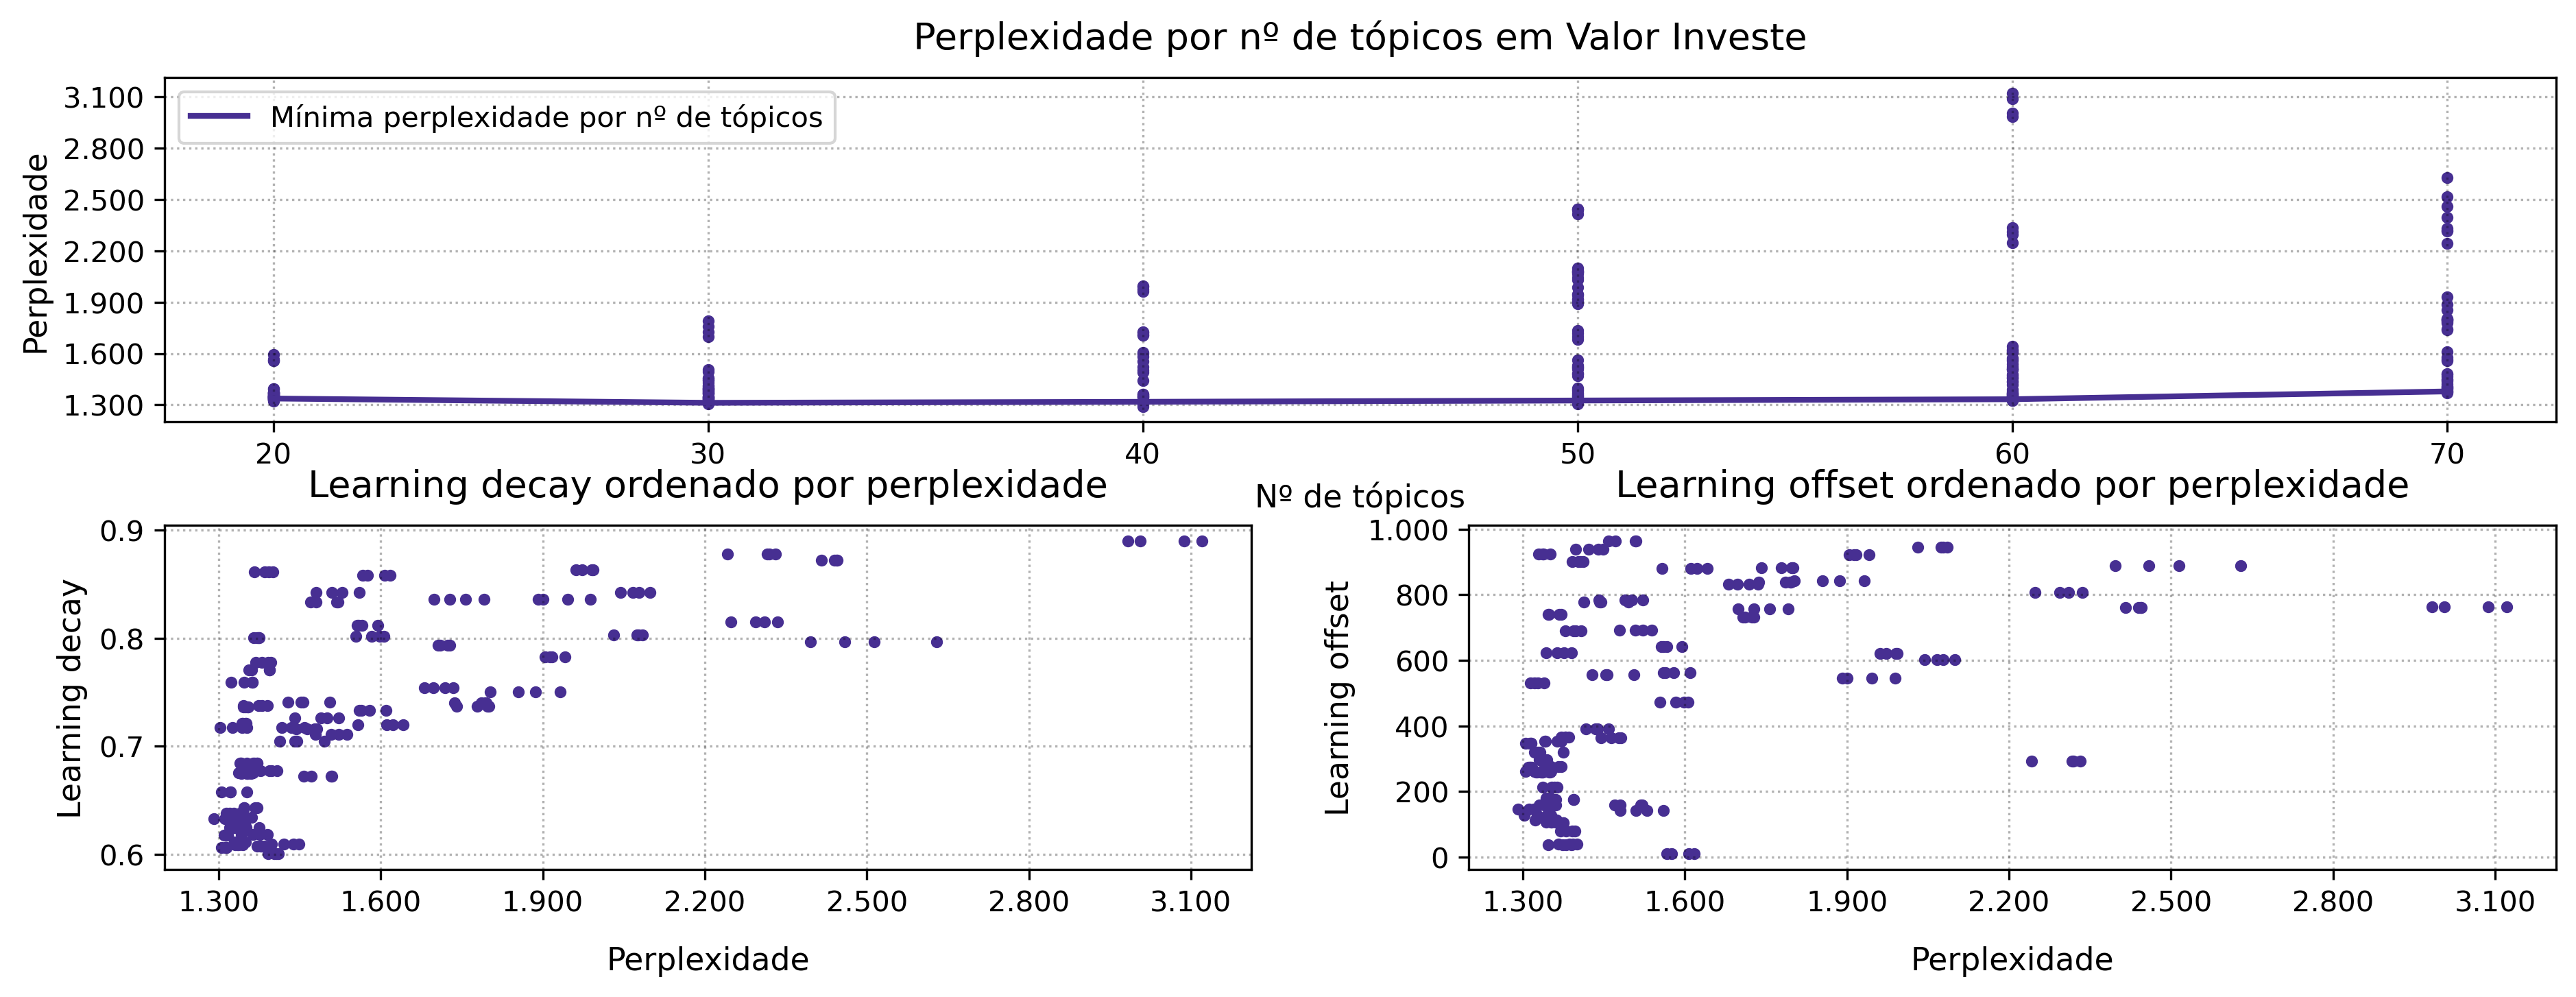

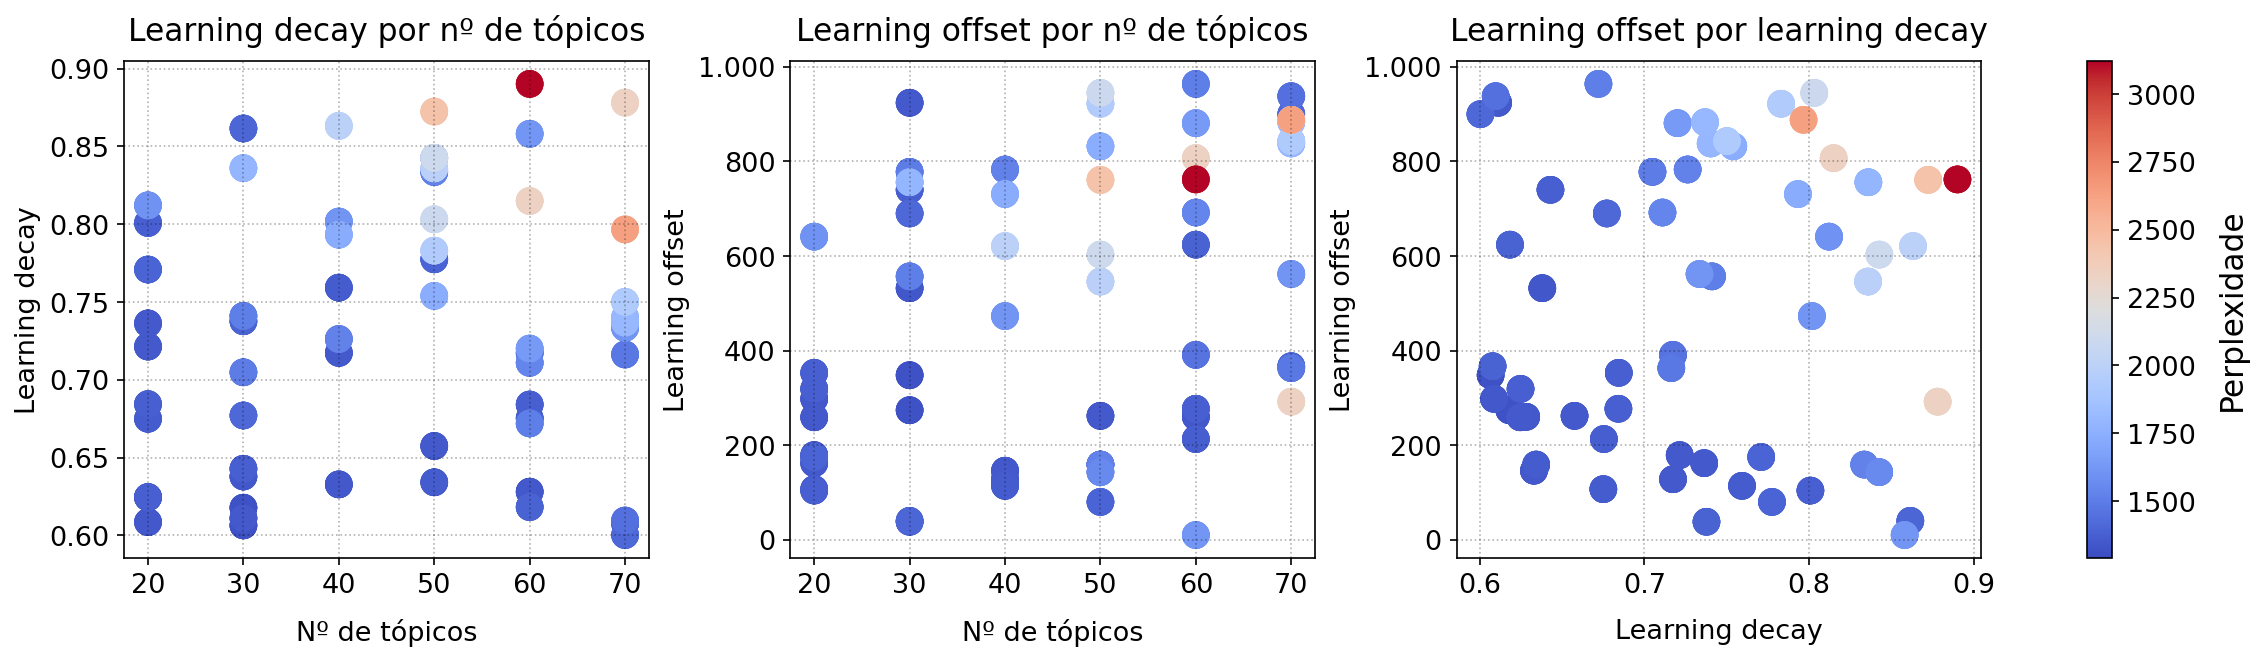

In [5]:
visualizar_parametragem(parametragem[parametragem.perplexity < 1000000], 'valorinveste')

## Ótimos por nº de tópicos

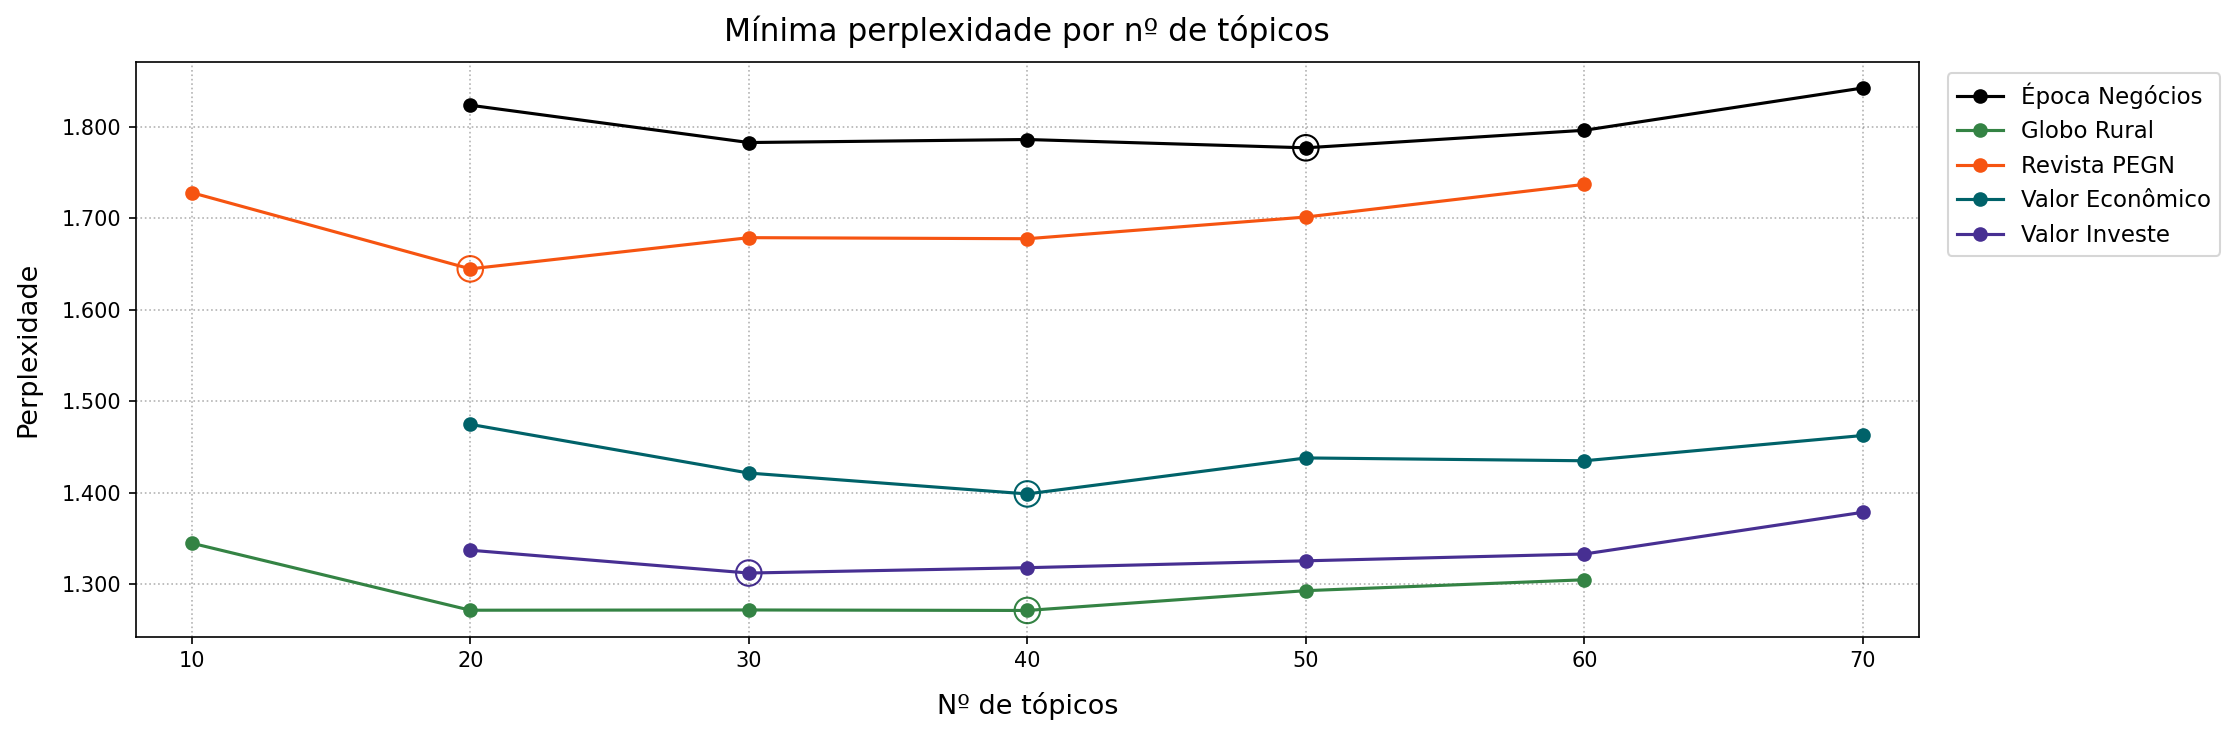

In [7]:
simulações = parametragem.groupby(['selection', 'simulation']).mean().reset_index()
parâmetros_ótimos = simulações.sort_values('perplexity').drop_duplicates(subset = 'selection')
parâmetros_ótimos['method'] = 'online' 

plt.figure(figsize = (15,5), dpi = 150)
plt.title('Mínima perplexidade por nº de tópicos', pad=10, fontsize = 15)

for seleção in sorrisos_perplexos.seleção.unique():
    plt.plot(*sorrisos_perplexos[sorrisos_perplexos.seleção == seleção].iloc[:,1:].T.values.tolist(),
             color = cores[seleção], marker = 'o', label = nomes[seleção])
    plt.scatter(*parâmetros_ótimos[parâmetros_ótimos.selection == seleção][['n_components', 'perplexity']].T.values.tolist(),
                color = cores[seleção], s = 150, facecolors = 'none', edgecolors = cores[seleção], linewidths = 1)

plt.grid(linestyle = ':', alpha = .3, color = 'black')
plt.xlim(8,72)

yticks = plt.yticks()[0][1:-1]
ytick_labels = [f'{ytick:,.0f}'.replace(',', '.') for ytick in yticks]
plt.yticks(yticks, ytick_labels)

plt.ylabel('Perplexidade', labelpad=10, fontsize=13)
plt.xlabel('Nº de tópicos', labelpad=10, fontsize=13)

plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=11)
plt.tight_layout()
plt.show()

## Comparando batch e online

In [8]:
arquivos = [arquivo for arquivo in os.listdir('perplexidades') if '.xlsx' in arquivo and 'batch' in arquivo and 'agregação' not in arquivo]
portais = list(map(lambda x: x.split(' - ')[0], arquivos))

dfs = []
for arquivo, portal in zip(arquivos, portais):
    df = pd.read_excel(f'perplexidades/{arquivo}')
    df['Portal'] = portal
    dfs.append(df)

amostras_de_perplexidade = pd.concat(dfs)
perplexidades_médias = amostras_de_perplexidade.groupby(['Método', 'Portal', 'Nº de tópicos']).mean().reset_index()
perplexidades_mínimas = perplexidades_médias.sort_values('Perplexidade').drop_duplicates(subset = 'Portal')

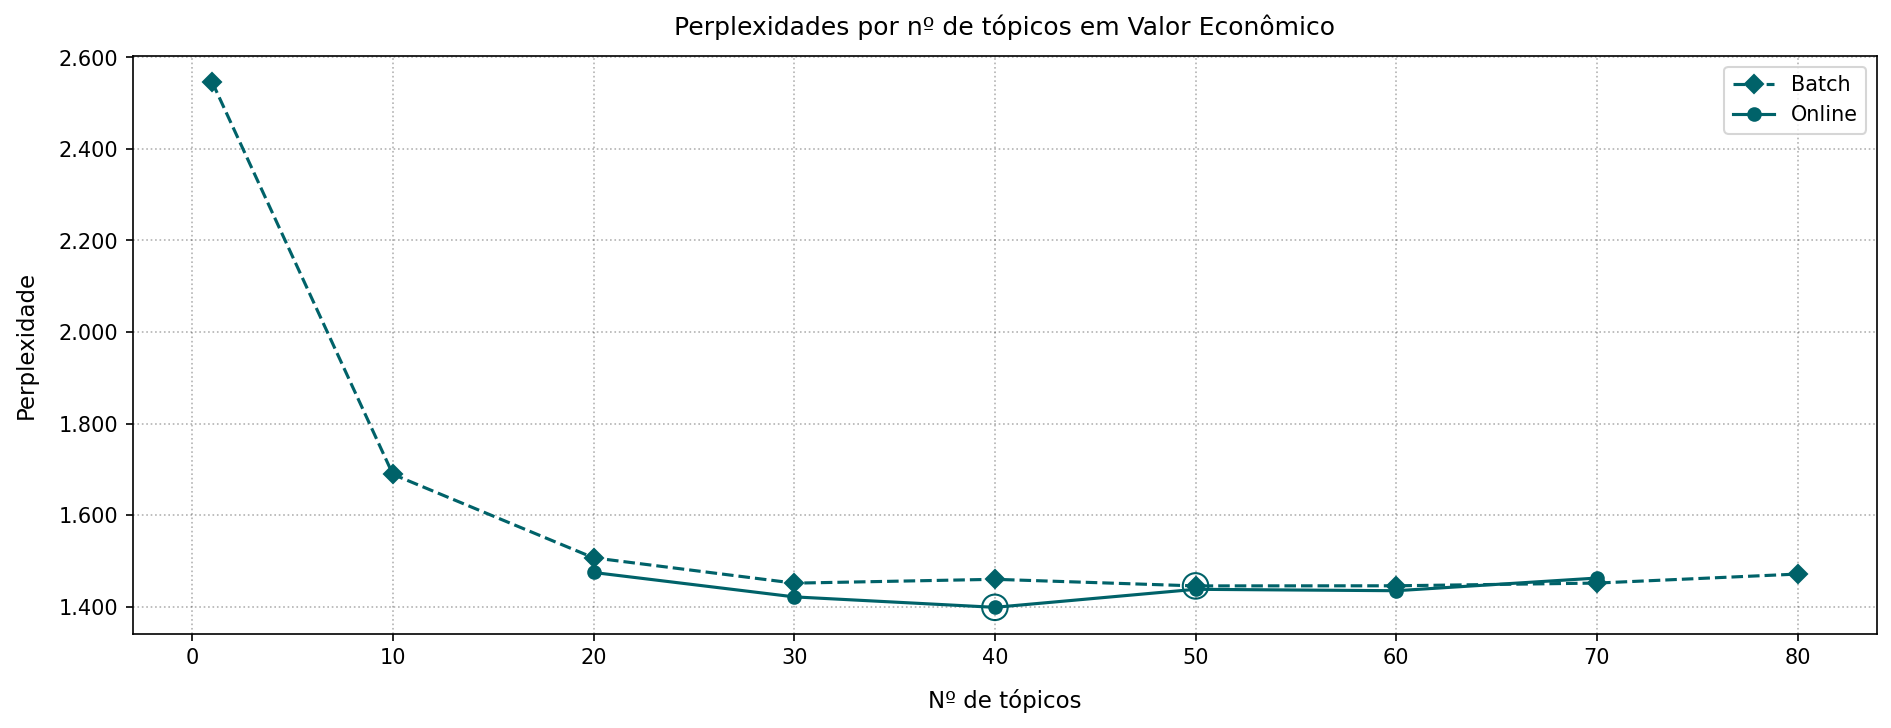

In [9]:
portal = seleção = 'valor'
plt.figure(figsize = (15,5), dpi = 150)
plt.title(f'Perplexidades por nº de tópicos em {nomes[seleção]}', pad=10)

plt.plot(*perplexidades_médias[perplexidades_médias.Portal == seleção][['Nº de tópicos', 'Perplexidade']].T.values.tolist(), 
         color = cores[portal], linestyle = '--', label = 'Batch', marker = 'D')
plt.scatter(*perplexidades_mínimas[perplexidades_mínimas.Portal == portal][['Nº de tópicos', 'Perplexidade']].T.values.tolist(),
            color = cores[portal], s = 150, marker = 'o', facecolors = 'none', edgecolors = cores[seleção], linewidths = 1)

plt.plot(*sorrisos_perplexos[sorrisos_perplexos.seleção == seleção].iloc[:,1:].T.values.tolist(),
         color = cores[seleção], label = 'Online', marker = 'o')
plt.scatter(*parâmetros_ótimos[parâmetros_ótimos.selection == seleção][['n_components', 'perplexity']].T.values.tolist(),
            color = cores[seleção], s = 150, marker = 'o', facecolors = 'none', edgecolors = cores[seleção], linewidths = 1)


yticks = plt.yticks()[0][1:-1]
ytick_labels = [f'{ytick:,.0f}'.replace(',', '.') for ytick in yticks]
plt.yticks(yticks, ytick_labels)

plt.ylabel('Perplexidade', labelpad=10, fontsize=11)
plt.xlabel('Nº de tópicos', labelpad=10, fontsize=11)

plt.grid(linestyle = ':', alpha = .3, color = 'black')
plt.legend()
plt.show()